<a href="https://colab.research.google.com/github/Ell-neto/Deep_learning/blob/main/Classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
Keras

*A diferença do Deep Learning com o Machine Learning está no modelo de ML que aprende com as características que nomeamos, enquanto o Deep Learning tem funções que extraem essas características.*

## Tratando os dados

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#analisar o tamanho do conjunto dos dados de treino e teste
print(imagens_treino.shape, imagens_teste.shape)
#O primeiro número indica que temos 60 000 imagens, o segundo que são compostas de 28 linhas e o terceiro que elas são compostas de 28 colunas para o imagens_treino.

(60000, 28, 28) (10000, 28, 28)


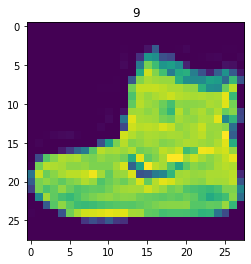

In [ ]:
#para visualizar  as imagens
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

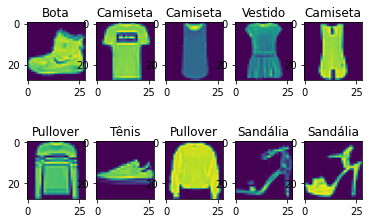

In [ ]:
total_classificacoes = 10
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

# plt.imshow(imagens_treino[0])
# plt.colorbar()

## Montando o modelo

Normalizando as imagens

In [ ]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias e perdas de treino e validação por época

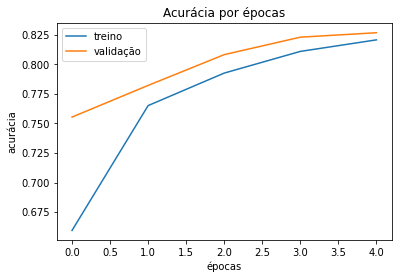

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])
plt.show()

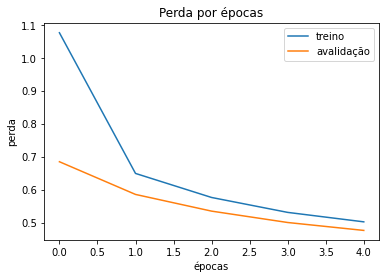

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avalidação'])
plt.show()

Testando e avaliando o modelo

In [ ]:
#Avaliar a predicao com o esperado
testes = modelo.predict(imagens_teste)
print('Resultado teste: ', np.argmax(testes[0]))
print('Número da imagem de teste: ', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

Resultado teste:  9
Número da imagem de teste:  9
Resultado teste do modelo salvo:  2
Número da imagem de teste:  2


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

#primeira posição - perda, segunda posição - acuracia

313/313 [==============================] - 1s 2ms/step - loss: 73.1915 - accuracy: 0.8531
Perda do teste:  73.19151306152344
Acurácia do teste:  0.8531000018119812
